In [2]:
'''
So far we have
• Seen what a linear regression model is.
• Seen how it is represented using the equation of a line.
• Learned about the parameters that govern how well the line
generalises the data.
• Learned how the gradient descent works intuitively
and mathematically.
Understood the assumptions of linear regression.
Implemented the linear regression model and verified
the assumptions.


X Input
Add External Data Better or moreintelligent useof existing data
Model f(x)
BANK
Application Date
City
Gender Incom. Birth Year
Y Output
◆ Age of customer
Category of income
• Low income
• High income
• Average income

introducing new features with the help of existing feature is called feature enginnering 
science of extracting more data from existing data

Feature Preprocessing 

Changing, updating
or transforming the
existing features


Feature Engineering
Feature Generation
Generating new
features from the
existing features

Feature generation refers to creating new features from the existing
data and not simply transforming the values of existing features.
'''

'\nSo far we have\n• Seen what a linear regression model is.\n• Seen how it is represented using the equation of a line.\n• Learned about the parameters that govern how well the line\ngeneralises the data.\n• Learned how the gradient descent works intuitively\nand mathematically.\nUnderstood the assumptions of linear regression.\nImplemented the linear regression model and verified\nthe assumptions.\n\n\nX Input\nAdd External Data Better or moreintelligent useof existing data\nModel f(x)\nBANK\nApplication Date\nCity\nGender Incom. Birth Year\nY Output\n◆ Age of customer\nCategory of income\n• Low income\n• High income\n• Average income\n\nintroducing new features with the help of existing feature is called feature enginnering \nscience of extracting more data from existing data\n\nFeature Preprocessing \n\nChanging, updating\nor transforming the\nexisting features\n\n\nFeature Engineering\nFeature Generation\nGenerating new\nfeatures from the\nexisting features\n\nFeature generation r

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
data=pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
sum(data.isnull().sum())

0

## Feature preprocessing 

feature preprocessing using feature transformation 
Transformation(model specific) to linearize the relationship
between the target variable and the feature.

Right skewed-nth root or log(x)
Left skewed-nth power or exp


Text(0.5, 1.0, 'Distribution of flat area')

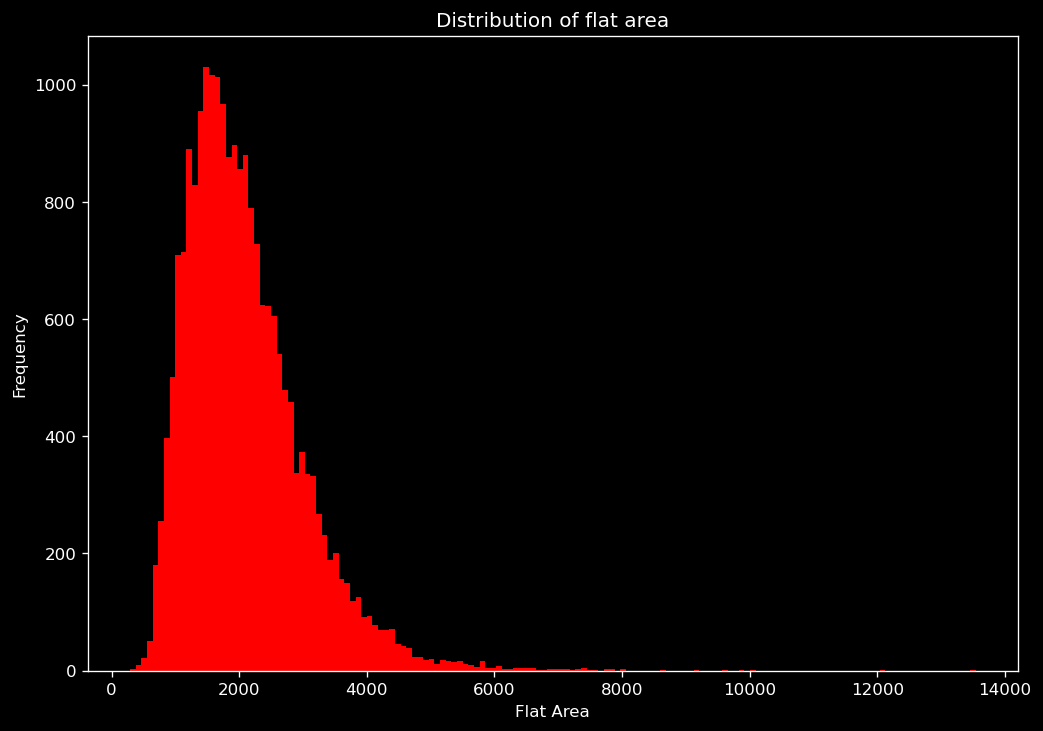

In [6]:
plt.figure(figsize=(10,7), dpi=120)
plt.hist(data['Flat Area (in Sqft)'],bins=150,color='red')
plt.xlabel('Flat Area')
plt.ylabel('Frequency')
plt.title('Distribution of flat area')

In [7]:
def log_transform(sample_data):
    return np.log(sample_data)

In [8]:
data['Transformed Flat Area']=data['Flat Area (in Sqft)'].map(log_transform)

Text(0.5, 1.0, 'Distribution of flat area')

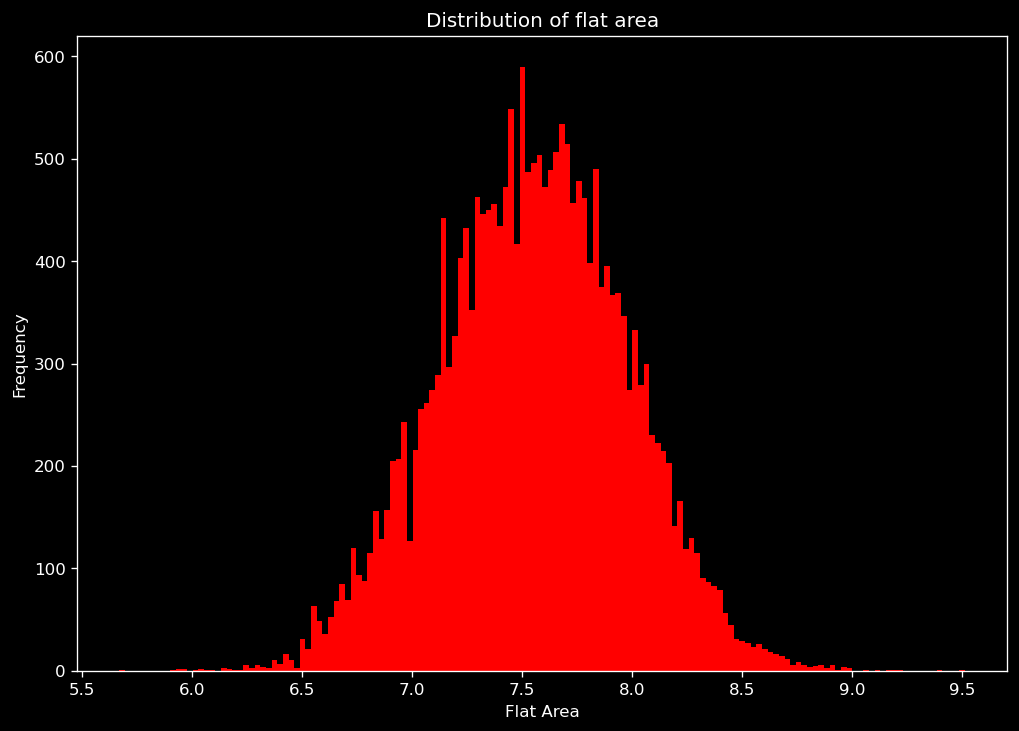

In [9]:
plt.figure(figsize=(10,7), dpi=120)
plt.hist(data['Transformed Flat Area'],bins=150,color='red')
plt.xlabel('Flat Area')
plt.ylabel('Frequency')
plt.title('Distribution of flat area')

## Feature transformation(categorical encoding)

A variable transformation technique for categorical variables
2 types-
1)one hot encoding or dummy encoding-A separate dummy feature is created for every level present in the categorical column.

Benefits of label encoding:

• Simple

• The model detects the relation between the individual categories by itself using the gradient descent.

downside-increases the dimensionality-having too many features inhibits the optimum learning
 To counter this we can use label encoding
2)label encoding

The order in the feature "Condition of the House" is as follows:
Bad < Okay <Fair < Good < Excellent

Bad = 1
Okay = 2
Fair = 3
Good = 4
Excellent = 5


• A new column for each level in our categorical variable can be avoided.
• The dimensionality stays the same.

Label encoding is used when the order among
different levels is known.


In [10]:
label_encoded=data['Condition of the House']
label_encoded.value_counts()

KeyError: 'Condition of the House'

In [11]:
data.dtypes

Sale_Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
No of Times Visited                            int64
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Latitude                                     float64
Longitude                                    float64
Living Area after Renovation (in Sqft)       float64
Lot Area after Renovation (in Sqft)            int64
Years Since Renovation                         int64
Condition_of_the_House_Excellent               int64
Condition_of_the_House_Fair                    int64
Condition_of_the_House_Good                   

In [14]:
data=pd.read_csv('Raw_Housing_Prices3.csv')
data.head()


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [15]:
data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

In [23]:
label_encoded=data['Condition of the House']
label_encoded.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [24]:
label_encoded= label_encoded.map({'Bad':1,
                                 'Okay':2,
                                 'Fair':3,
                                 'Good':4,
                                 'Excellent':5,}
                                )


In [25]:
label_encoded.value_counts()
label_encoded

0        3
1        3
2        3
3        5
4        3
        ..
21604    3
21605    3
21606    3
21607    3
21608    3
Name: Condition of the House, Length: 21609, dtype: int64

## Binning

• Is the process of aggregating data points in different
categories to reduce the redundancy.

• Can be implemented on both the numerical and
categorical columns

Reducing the redundancy of the independent variables.

Carrying out One-Hot_Encoding or creating the
dummy variables.

In Binning, we will look at the following:
• Binning of Categorical Variables-converting zipcode into variables
• Binning of Sparse Categories-occurs few times negligible to the size of dataset,group 
Binning of Continuous Variables#not always advisable as it turns into loss of information,continuous variable->categorical behaviou of 3 levels ,increases dimensionality

In [40]:
data['Condition of the House'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [41]:
data['Condition of the House'].value_counts()
#bad and okay occurs for very few number of times

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

In [42]:
mean=[]

for i in data['Condition of the House'].unique():
    mean.append(data['Sale Price'][data['Condition of the House']==i].mean())

Text(0, 0.5, 'Mean')

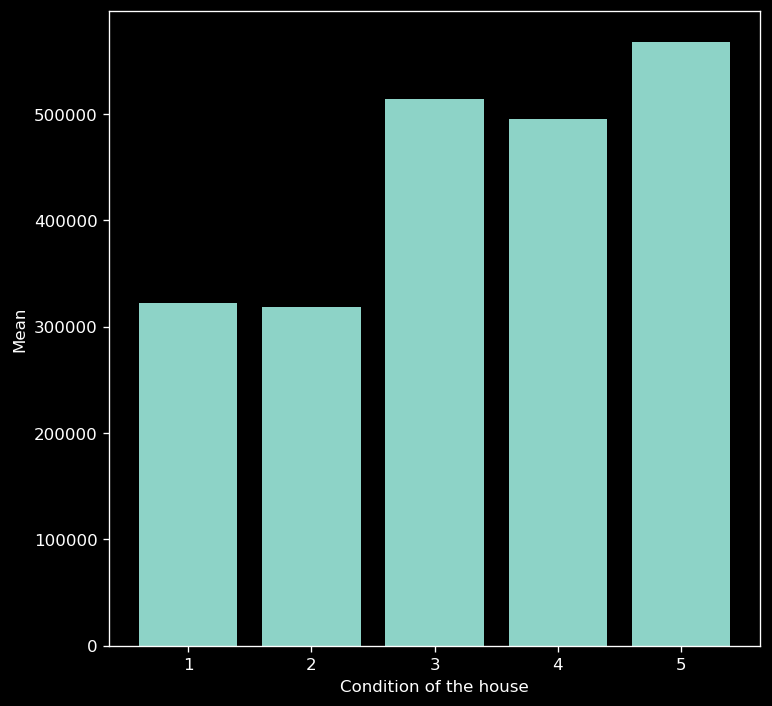

In [43]:
plt.figure(figsize=(7,7),dpi=120)
plt.bar(data['Condition of the House'].unique(),mean)
plt.xlabel('Condition of the house')
plt.ylabel('Mean')

In [44]:
mapping={'Bad':1,
        'Okay':2,
        'Fair':3,
        'Good':4,
        'Excellent':5,}
data['Condition of the House']=data['Condition of the House'].map(mapping)              

In [45]:
mean=[]

for i in data['Condition of the House'].unique():
    mean.append(data['Sale Price'][data['Condition of the House']==i].mean())

Text(0, 0.5, 'Mean')

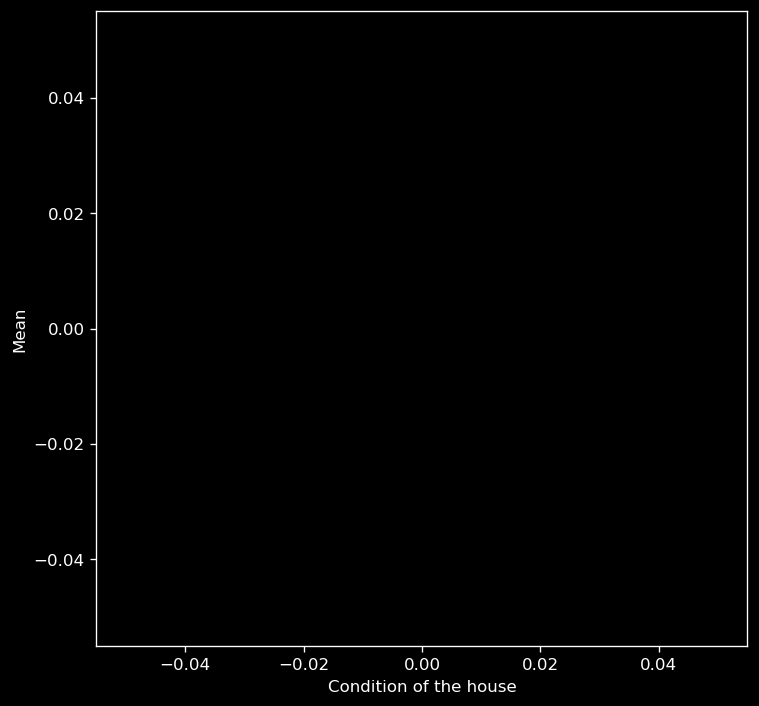

In [52]:
plt.figure(figsize=(7,7),dpi=120)
plt.bar(data['Condition of the House'].unique(),mean)
plt.xlabel('Condition of the house')
plt.ylabel('Mean')

In [47]:
data['Age of House (in Years)'].unique()

array([ 63,  67,  85,  53,  31,  17,  23,  55,  58,  15,  76,  91,  41,
       118,  39,  24, 102,  97,  49,  71,  50,  33,  77, 103, 109,  70,
        13,  89,  37,  88, 114,  22,  18,  34,   4,  96,  59,  52,  65,
        68,  10,  27,  64,  45,  93,  29,  46,  32,  62,  16,  26,  54,
        66,  57,  12,  56,  79,  72,  51,  43,  38, 108,  35,  40, 113,
        47,   8,  73,  94,  28, 104,  92,  14,  95,  11,  42,  69,  19,
       117,  30,  25,  98,  21,  75,  61,  78, 100,  90,  44, 107,  82,
        81,  36, 110,  87,  20, 105,   5, 111,  60,   6, 106,   7, 101,
        86,  74, 116,   9, 115,  48,   3,  84,  80,  99, 112,  83],
      dtype=int64)

In [48]:
data['Age of House (in Years)'].max()

118

In [49]:
data['Age of House (in Years)'].min()

3

In [50]:
def ageofhouse(x):
    if x<10:
        x='new'
    elif x<50:
        x='old'
    else:
        x='very old'
    return x


In [51]:
cathouseage= data['Age of House (in Years)'].map(ageofhouse)
cathouseage.unique()

array(['very old', 'old', 'new'], dtype=object)

## Feature Generation

Feature Extraction:

• The process of extracting information from
the original features.

• The extracted feature contains the information
in simpler form.

• The information can be used to increase the
model performance.

Combination factor:Efficient combination of two features can result
in improved prediction power of our model.

Feature engineering:
• Methods can vary drastically from
problem to problem.


• Does not always work.


• Can increase the model performance
significantly.